**Disney Channel Stars**

Here is a project where I look at how former Disney Channel Stars are doing now in terms of explicitness of music and populatiry. 

In [1]:
# import your emotional support pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data (handcrafted by yours truly)
data = pd.read_csv('album-data.csv')

In [3]:
# playground
data.head()

,Artist,Album,Year,Song Count,Billboard 200 peak position,Billboard weeks on chart,Number of songs w/ Explicit Tags
0,Demi Lovato,Don't Forget,2008,11,2,45,0
1,Demi Lovato,Here We Go Again,2009,14,1,24,0
2,Demi Lovato,Unbroken,2011,15,4,42,0
3,Demi Lovato,Demi,2013,13,3,51,0
4,Demi Lovato,Confident,2015,15,2,41,4


**Explicit vs Weeks Charted** (raw data and relative frequency)

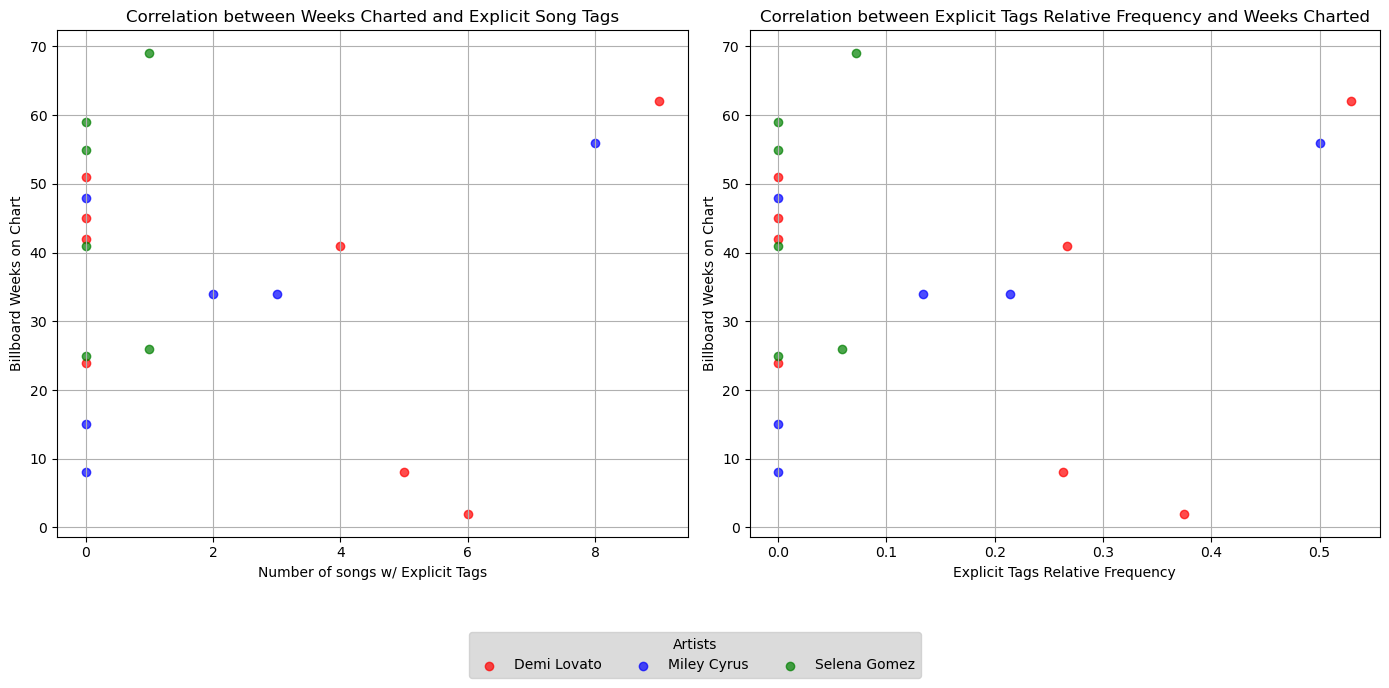

In [4]:
# Mapping colors to each artist
colors = {
    "Demi Lovato": "red",
    "Miley Cyrus": "blue",
    "Selena Gomez": "green"
}

# Calculate relative frequency of songs with explicit tags divided by total songs in each album
explicit_tags_relative_frequency = [data["Number of songs w/ Explicit Tags"][i] / data["Song Count"][i] for i in range(len(data["Artist"]))]

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Lists to store legend handles and labels
legend_handles = []
legend_labels = []

# Plotting the first scatter plot (Explicit Tags vs. Weeks Charted)
for i, artist in enumerate(data["Artist"]):
    scatter = axs[0].scatter(data["Number of songs w/ Explicit Tags"][i], data["Billboard weeks on chart"][i], color=colors[artist], alpha=0.7)
    if artist not in legend_labels:
        legend_handles.append(scatter)
        legend_labels.append(artist)

axs[0].set_title("Correlation between Weeks Charted and Explicit Song Tags")
axs[0].set_xlabel("Number of songs w/ Explicit Tags")
axs[0].set_ylabel("Billboard Weeks on Chart")
axs[0].grid(True)

# Plotting the second scatter plot (Explicit Tags Relative Frequency vs. Weeks Charted)
for i, artist in enumerate(data["Artist"]):
    scatter = axs[1].scatter(explicit_tags_relative_frequency[i], data["Billboard weeks on chart"][i], color=colors[artist], alpha=0.7)
    if artist not in legend_labels:
        legend_handles.append(scatter)
        legend_labels.append(artist)

axs[1].set_title("Correlation between Explicit Tags Relative Frequency and Weeks Charted")
axs[1].set_xlabel("Explicit Tags Relative Frequency")
axs[1].set_ylabel("Billboard Weeks on Chart")
axs[1].grid(True)

# Add legend with correct colors
fig.legend(legend_handles, legend_labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=len(legend_labels), title="Artists", facecolor='lightgrey')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


**Explicit vs Billboard 200 Rank** (raw data and relative frequency)

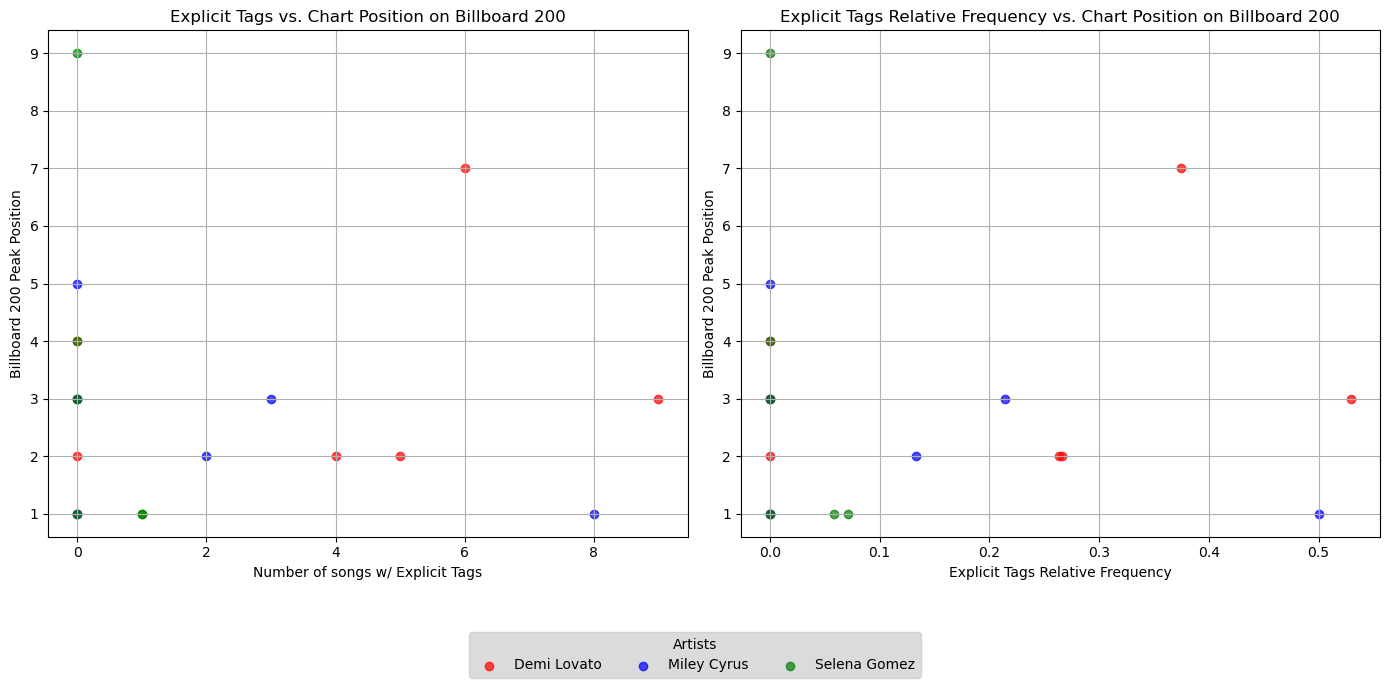

In [5]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Lists to store legend handles and labels
legend_handles = []
legend_labels = []

# Plotting the first scatter plot (Explicit Tags vs. Chart Position on Billboard 200)
for i, artist in enumerate(data["Artist"]):
    scatter = axs[0].scatter(data["Number of songs w/ Explicit Tags"][i], data["Billboard 200 peak position"][i], color=colors[artist], alpha=0.7)
    if artist not in legend_labels:
        legend_handles.append(scatter)
        legend_labels.append(artist)

axs[0].set_title("Explicit Tags vs. Chart Position on Billboard 200")
axs[0].set_xlabel("Number of songs w/ Explicit Tags")
axs[0].set_ylabel("Billboard 200 Peak Position")
axs[0].grid(True)

# Plotting the second scatter plot (Explicit Tags Relative Frequency vs. Chart Position on Billboard 200)
for i, artist in enumerate(data["Artist"]):
    scatter = axs[1].scatter(explicit_tags_relative_frequency[i], data["Billboard 200 peak position"][i], color=colors[artist], alpha=0.7)
    if artist not in legend_labels:
        legend_handles.append(scatter)
        legend_labels.append(artist)

axs[1].set_title("Explicit Tags Relative Frequency vs. Chart Position on Billboard 200")
axs[1].set_xlabel("Explicit Tags Relative Frequency")
axs[1].set_ylabel("Billboard 200 Peak Position")
axs[1].grid(True)

# Add legend with correct colors
fig.legend(legend_handles, legend_labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=len(legend_labels), title="Artists", facecolor='lightgrey')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

**Explicitry Over Time**

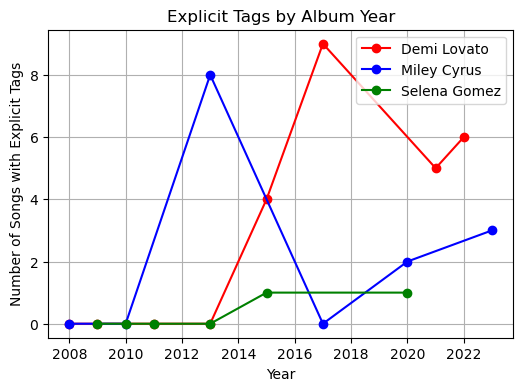

In [15]:
plt.figure(figsize=(6, 4))

for artist, group in data.groupby('Artist'):
    plt.plot(group['Year'], group["Number of songs w/ Explicit Tags"], marker='o', label=artist, color=colors[artist])

plt.title('Explicit Tags by Album Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs with Explicit Tags')
plt.legend()
plt.grid(True)
plt.show()